## Programming for A&A - Assignment 3
## Kaya Han Taş - 15064735

### 1-)
### Use the FITS functionality from astropy to open the FITS File.
### Access the image data in the FITS file and create a plot of it using matplotlib. You will have to adjust the range of pixel values that are shown by matplotlib in order to show the Stars clearly. Look at the documentation of "pyplot.imshow", there are relevant keyword arguments to adjust this range.
### The image you just created has no sky coordinates along the axes, instead it has pixel coordinates. "astropy" contains a module "astropy.wcs" which can deal with the World Coordinate System, which allows you to create plots with proper sky-coordinates. Read through the documentation for the "astropy.wcs" module. It shows you how you can add the sky coordinates to a plot of the image data. 
### You should look through the FITS header and confirm that it contains a WCS section. It is that section that describes how the image pixels are projected on the sky.
### Create a plot of the Globular Cluster NGC 104 that shows the stars in the cluster and has axes labeled with sky coordinates.

In [1]:
#In order to avoid confusion, Let's first focus on everything we do step by step.
#Then, by the end of the question, we will create a function with the steps we
#have discussed.

#---------------------------------------------------------------------------
#We first need to import "fits" sub-package from astropy and matplotlib in order
#to start our work.
from astropy.io import fits
import matplotlib.pyplot as plt

#We put the following command in order to make our plots interactive in our
#notebook.
%matplotlib notebook

#First, we open our file as follows.
cluster_file = fits.open("ic2r02050_drz.fits")

#We can check its information by using the command:
cluster_file.info()

Filename: ic2r02050_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1189   ()      
  1  SCI           1 ImageHDU        93   (4203, 4536)   float32   
  2  WHT           1 ImageHDU        47   (4203, 4536)   float32   
  3  CTX           1 ImageHDU        42   (4203, 4536)   int32   
  4  HDRTAB        1 BinTableHDU    559   24R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 11A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

<IPython.core.display.Javascript object>


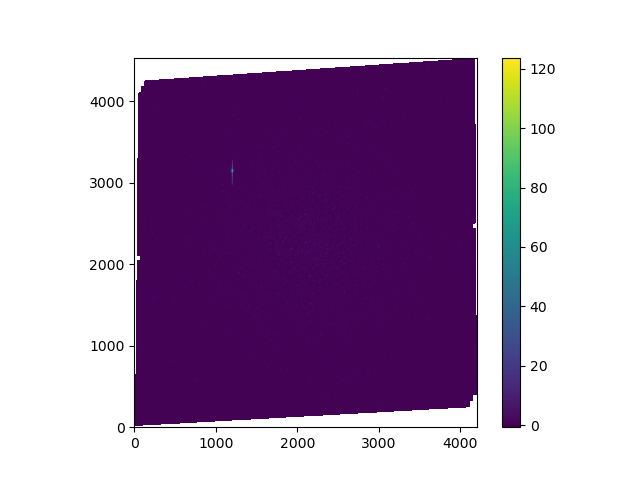

In [2]:
#Our FITS data consists of 5 Header Data Units.
#The assignment has told us that the image data we need is in the first ("SCI") 
#extension/HDU!
#For this reason, we need only to use that HDU (Header Data Unit)
#We can only pull the SCI data from the FITS file as follows.
#(This is an image! You can't pull its columns but you can pull its header...)
cluster_file = fits.open("ic2r02050_drz.fits")[1] #1 = "SCI"

#We also define a variable for SCI data aka the pixel values of our Image.
cluster_data = cluster_file.data

#print(cluster_data) #Remove the "#" on the beginning of the line to print the data.

#Now we check our image, for this we use matplotlib's imshow!
plt.figure() #Creating the figure

#Now we use the imshow
    #origin = Where to place the 0,0 (aka origin) of our plot.
    
plt.imshow(cluster_data, origin = "lower")

#We also add a colorbar for convenience to understand which color represents
#which (pixel) values.
plt.colorbar()

#Now we show our image.
plt.show()

<IPython.core.display.Javascript object>


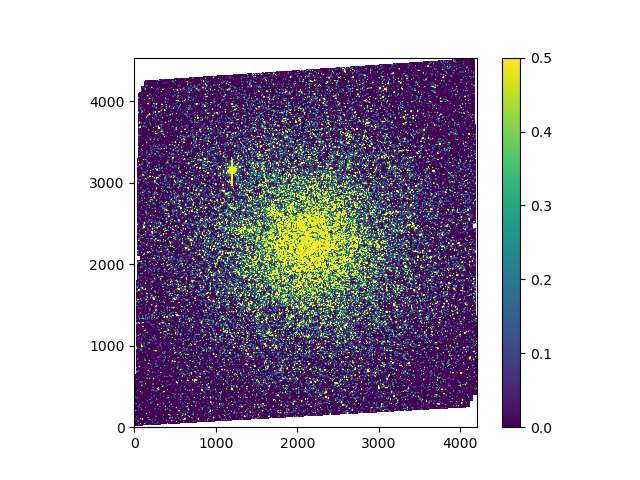

In [3]:
#We see that the image doesn't show us all the stars.
#For this reason, we need to change the values of the maximum and minimum pixel
#values shown in our plot.
#For this problem, we can use "vmax" and "vmin" parameters in the imshow function.
#It basically helps us scale all the pixel values between two boundaries.
    #plt.imshow(cluster_data, origin = "lower", vmin = 0, vmax = 1)
    
#We can also use the "Logarithmic Normalize" by using the following:
    #from matplotlib.colors import LogNorm
    #plt.imshow(cluster_data, origin = "lower", norm=LogNorm())

#We will use the "vmax" and "vmin" method in our exercise.

plt.figure() #Creating the figure

#We again use the imshow
    #origin = Where to place the 0,0 (aka origin) of our plot.
    #vmin = Minimum Pixel Value in our Range
    #vmax = Maximum Pixel Value in our Range

#Note that we use the default colour map.
#But if needed, we can use different color maps by the cmap argument.
#Color Map List: https://matplotlib.org/stable/gallery/color/colormap_reference.html

#We use imshow to show our FITS image.
plt.imshow(cluster_data, origin = "lower", vmin=0, vmax=0.5)

#To see a small part of our FITS image we can use SLICING!
#You can run the example below to see a smaller part of our image.
#Note that the slicing here is done as y,x not x,y.
#Remove the "#" on the line below to check it out.
#plt.imshow(cluster_data[2250:2650, 3350:3950], origin = "lower", vmin=0, vmax=0.5)

#We also add a colorbar for convenience to understand which color represents
#which (pixel) values.
plt.colorbar()

#Now we show our image.
plt.show()

In [4]:
#The image we have does not have sky-coordinates. (It has pixel coordinates)
#Now we have to create proper sky-coordinates for our image/plot.
#For this we use astropy.wcs!
from astropy.wcs import WCS

#We also need to confirm that our HDU in the FITS data has a WCS section.
#For this, we check our HDU header with the following command.
wcs_info = WCS(cluster_file.header)
print(wcs_info)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 6.022944326242634  -72.08165462548921  
CRPIX : 2101.5  2268.0  
CD1_1 CD1_2  : 1.09897641910978e-05  5.8935678832004e-07  
CD2_1 CD2_2  : 5.8935678832004e-07  -1.0989764191097e-05  
NAXIS : 4203  4536


<IPython.core.display.Javascript object>


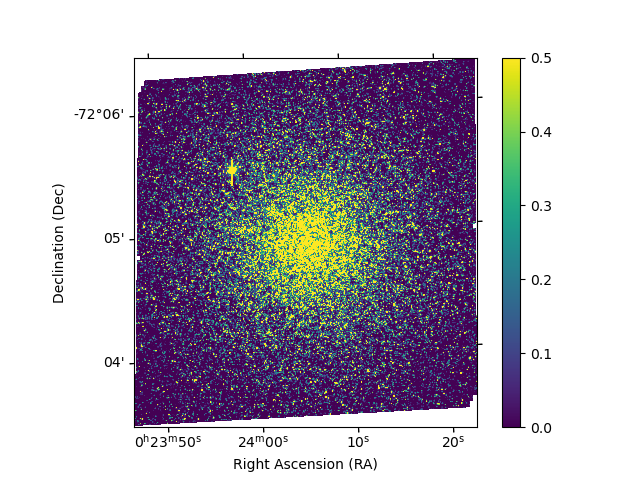

In [5]:
#NOTE: The conversion to WCS DOES NOT WORK on Astropy's older versions. If the
#code does not work, we need to make sure that we are on the latest version of
#astropy library.

#From here, we can plot the sky coordinates as follows.
#Using our wcs_info we have defined, we can do the following plotting.
image_wcs = plt.figure() #Creating the figure

#Now we need to add a subplot.
image_wcs.add_subplot(projection = wcs_info)

#We use imshow to show our FITS image.
plt.imshow(cluster_data, origin = "lower", vmin=0, vmax=0.5)

#We also add a colorbar for convenience to understand which color represents
#which (pixel) values.
plt.colorbar()

#We also add label names for convenience.
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (Dec)")

#Now we show our image.
plt.show()

<IPython.core.display.Javascript object>


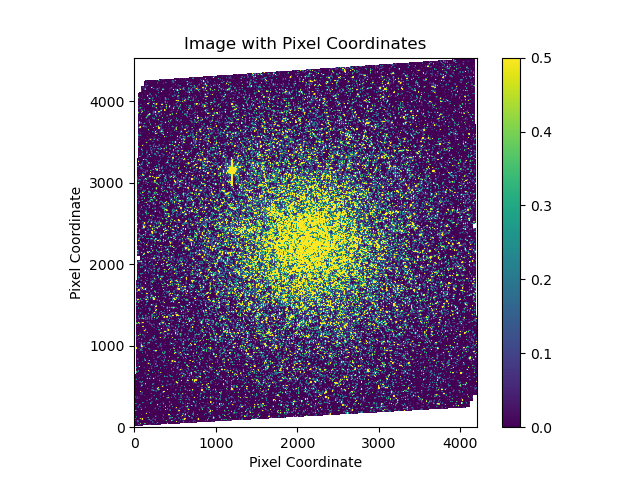

<IPython.core.display.Javascript object>


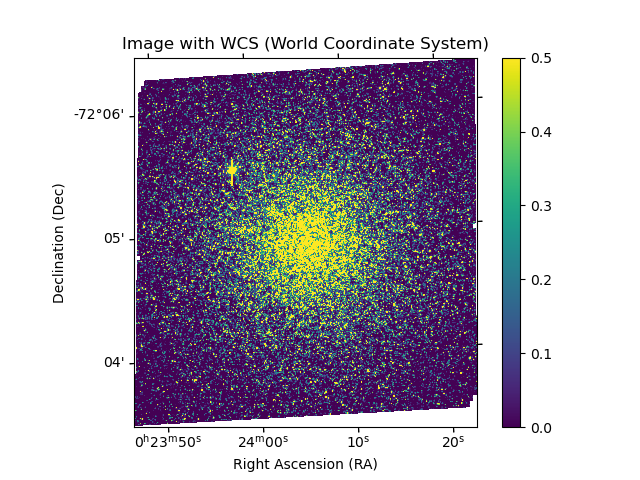

In [6]:
#Now, we define a function for our whole process.
#We import the libraries we use once again for "completion" purposes in the 
#cell we define the function on.

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.wcs import WCS

#Now we define our function.

def fits_image_show(fitsfile, HDUvalue):
    """Takes the FITS file and the HDU index the image is in, returns the plot
    of the Image in the given HDU with pixel values."""
    
    #Opens the given fitsfile and checks the HDU that the user has provided
    #to the function.
    cluster_file = fits.open(fitsfile)[HDUvalue]
    
    #We take the Data from the HDU.
    cluster_data = cluster_file.data
    
    #We plot the figure.
    plt.figure() #Creating the figure
    
    #We define the the origin location and maximum & minimum boundaries for the 
    #pixel values.
    plt.imshow(cluster_data, origin = "lower", vmin=0, vmax=0.5)
    
    #We also add a colorbar for convenience to understand which color represents
    #which (pixel) values.
    plt.colorbar()
    
    #We also add label names for convenience.
    plt.xlabel("Pixel Coordinate")
    plt.ylabel("Pixel Coordinate")
    plt.title("Image with Pixel Coordinates")
    
    #Now we show our image.
    plt.show()
    
    return

#We also define a function for WCS conversion.

def fits_image_WCS(fitsfile, HDUvalue):
    """Takes the FITS file and the HDU index the image is in, returns the plot
    of the Image in the given HDU with Right Ascension and Declination, in
    other words, World Coordinate System (WCS)."""
    
    #Opens the given fitsfile and checks the HDU that the user has provided
    #to the function.
    cluster_file = fits.open(fitsfile)[HDUvalue]
    
    #We take the Data from the HDU.
    cluster_data = cluster_file.data
    
    #We get the WCS info from the Header of our HDU.
    wcs_info = WCS(cluster_file.header)
    
    #Using our wcs_info we have defined, we can do the following plotting.
    image_wcs = plt.figure() #Creating the figure

    #Now we need to add a subplot.
    image_wcs.add_subplot(projection = wcs_info)

    #We define the the origin location and maximum & minimum boundaries for the 
    #pixel values.
    plt.imshow(cluster_data, origin = "lower", vmin=0, vmax=0.5)

    #We also add a colorbar for convenience to understand which color represents
    #which (pixel) values.
    plt.colorbar()
    
    #We also add label names for convenience.
    plt.xlabel("Right Ascension (RA)")
    plt.ylabel("Declination (Dec)")
    plt.title("Image with WCS (World Coordinate System)")

    #Now we show our image.
    plt.show()
    
    return

fits_image_show("ic2r02050_drz.fits", 1)
fits_image_WCS("ic2r02050_drz.fits", 1)

### 2-)

### Next, you will use the "astropy.photutils" package to detect stars in the image. Unless noted otherwise, you should perform the following analysis using the PIXEL COORDINATES.

### Install the "photutils" package if you don't already have it installed. 

### The "photutils" package expects data with the background substracted and without the NaN values. 

### Use numpy to mask NaN-Values and determine the Median of the image.

### Subtract the median from the image and after that, replace the NaN-values with zero.

<IPython.core.display.Javascript object>


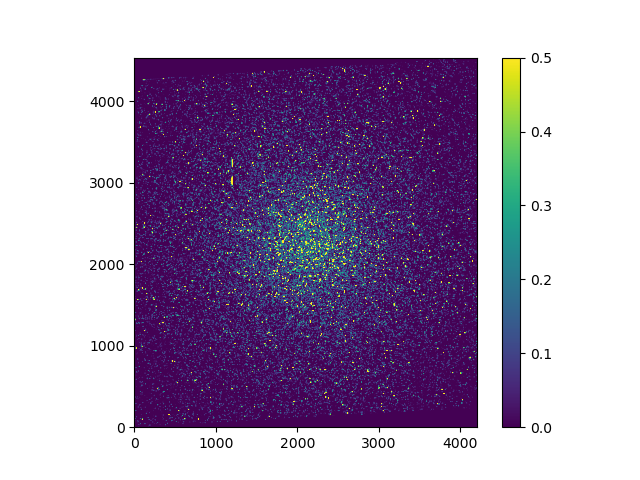

[[ 0.          0.         -0.01640873 ...  0.          0.
   0.        ]
 [ 0.          0.          0.00607842 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [7]:
#We will need the following libraries to:
    #1-) Find the Median of the Image => scipy
    #2-) Masking out the NaN-Values => numpy

#We import the libraries we need as follows.
import numpy as np
from scipy import signal

#We will define a function for Substracting the Median from the image and
#Replacing the NaN-Values with zero.

def cleaned_data(fitsfile, HDUvalue):
    """Takes the FITS file and the HDU index the image is in, returns the image
    cleaned from the NaN values (that are replaced with "0") and also subtracted
    from its median."""
    
    #Opens the given fitsfile and checks the HDU that the user has provided
    #to the function.
    cluster_file = fits.open(fitsfile)[HDUvalue]
    
    #We take the Data from the HDU.
    cluster_data = cluster_file.data
    
    #We now take the median of the data we have. (kernel_size = window size for
    #the median filtering process)
    image_median = signal.medfilt2d(cluster_data, kernel_size=[3,3])
    
    #We now subtract the median from our image.
    cluster_data = cluster_data - image_median
    
    #Finally, we remove the NaN-Values and replace them with zero.
    cluster_data[np.isnan(cluster_data)] = 0
    
    #We now plot the new image.
    plt.figure() #Creating the figure
    
    #We define the the origin location and maximum & minimum boundaries for the 
    #pixel values.
    plt.imshow(cluster_data, origin = "lower", vmin = 0, vmax = 0.5)
    
    #We also add a colorbar for convenience to understand which color represents
    #which (pixel) values.
    plt.colorbar()

    #Now we show our image.
    plt.show()
    
    return cluster_data

#Now using this function let's get our cleaned data.
cluster_data_cleaned = cleaned_data("ic2r02050_drz.fits", 1)
print(cluster_data_cleaned)

### 3-)
### Now, use "DAOStarFinder" from "photutils" to detect the star positions in the image.
### You can use fwhm = 3 and you should experiment with the value of "threshold" (which should be small compared to the flux per pixel in a typical star).
### Plot the Detected Stars over the Image of the NGC 104 Globular Cluster - Make sure that the star positions do line up with actual stars on the image and there are not many false detections of stars.

<IPython.core.display.Javascript object>


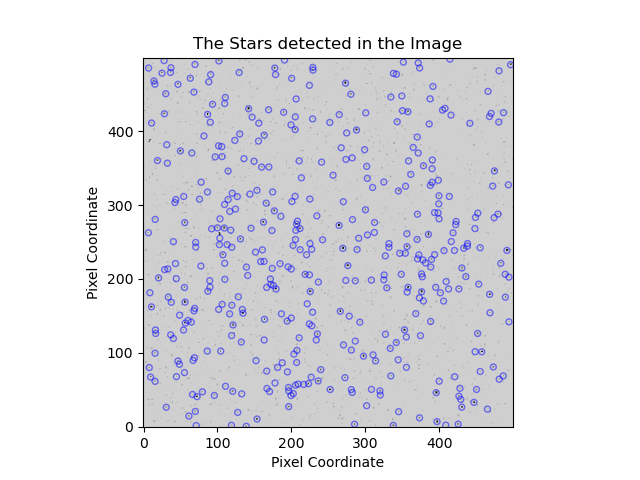

In [8]:
#We will check a smaller part of our image first in order to check if our
#detection method works well, then we will define a general function for
#our whole image.
#For more information about the libraries we are using and how they work: 
    #https://photutils.readthedocs.io/en/stable/detection.html
    #https://photutils.readthedocs.io/en/stable/aperture.html

#---------------------------------------------------------------------------
#Again we first need to import the required libraries.

#We first import our DAOStarFinder to detect the stars on our image
#Then we also import "CircularAperture" which is basically our "circles" that 
#will show us where the stars are.
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture

#We also import two libraries for normalizing our image/pixel values.
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

#First we use DAOStarFinder function to find our stars.
#In here:
    #1-) fwhm: Means "Full Width Half Maximum" and according to the question 
    #should be set to 3.
    #2-) threshold: We will use this to define the Absolute Image/Pixel value
    #above which to select sources. (So it should be smaller than the flux per
    #pixel in a typical star like the question states.)

#For the sake of checking if our detection methods work well, we set the
#threshold really high.
star_finder = DAOStarFinder(fwhm = 3, threshold = 6)

#Now we give the dataset to our Star Finder by using the following line.
stars = star_finder(cluster_data_cleaned[2000:2500, 2000:2500])

#print(stars) #Remove the "#" to see the result.

#Now we use "np.transpose" in order to have an array with its elements being 
#[x y] so basically the locations/coordinates of our stars, found by our Star 
#Finder.
#For this reason, we only take the ["xcentroid"] and ["ycentroid"] columns of
#our "star finder" data.
star_positions = np.transpose((stars["xcentroid"], stars["ycentroid"]))

#print(positions) #Remove the "#" to see the result.

#Now we define our circles, which will show us the positions of the stars in our
#plot/image.
#In here: r represents the radius of our circles, which we can pick as 4 pixels.
circles = CircularAperture(star_positions, r = 4)

#Finally, before we print the plot we need to normalize our pixel values.
#We basically define "norm" for our plt.imshow().
    #Stretch: https://docs.astropy.org/en/stable/api/astropy.visualization.BaseStretch.html#astropy.visualization.BaseStretch
normalization = ImageNormalize(stretch = SqrtStretch())

#Now we plot our image with our detected stars.
plt.figure()

#We define the colormap of the image, the origin location and normalization
#method for the pixel values.
#We also add an extra "interpolation" argument to get an upsampled image, which
#will help us see the stars much clearer. (We will use "nearest")
#We also will use "Greys" color map for this section of our exercise.
plt.imshow(cluster_data_cleaned[2000:2500, 2000:2500], cmap = "Greys", origin = "lower", norm = normalization, interpolation = "nearest")

#We also plot our circles.
#In here:
    #Color = Color of the Circle
    #lw = Line Width of the Circle
    #alpha = The Opacity of the Circle
circles.plot(color = 'blue', lw = 1, alpha = 0.5)

#We also add our labels
plt.xlabel("Pixel Coordinate")
plt.ylabel("Pixel Coordinate")
plt.title("The Stars detected in the Image")

#Now we show our image with the detected stars
plt.show()

#Note: If there were really bright sources in our image, we should use masking.
#We can find more info on how to do it on https://photutils.readthedocs.io/en/stable/detection.html

In total 58490 stars have been detected in the image.


<IPython.core.display.Javascript object>


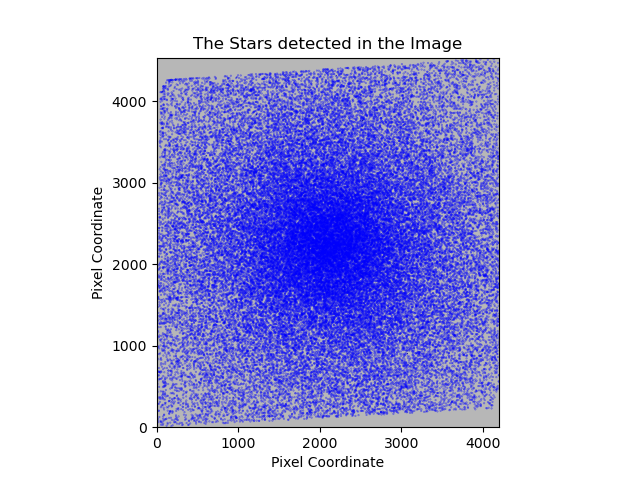

In [9]:
#Now that we have discussed how the whole method works and we have checked
#a small part of our image in order to test it out, let's create our function.
#We import the libraries we use once again for "completion" purposes in the 
#cell we define the function on.

from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

def star_finder(cleanedfitsdata, threshold):
    """Takes the cleaned image data (cleared from NaN values and subtracted
    from its median) alongside the threshold for pixel values which the program 
    will detect as a star.
    
    The function returns the resulted image where every star in the image is 
    shown with a blue colored circle. It also returns the x and y coordinates 
    of the detected stars as an array."""
    
    #We first define the parameters for DAOStarFinder in order for it to see
    #what should be detected as a star.
    star_finder = DAOStarFinder(fwhm = 3, threshold = threshold)

    #Now we give the dataset to our Star Finder by using the following line.
    stars = star_finder(cleanedfitsdata)

    #Now we use "np.transpose" in order to have an array with its elements being 
    #[x y] so basically the locations/coordinates of our stars, found by our Star 
    #Finder.
    star_positions = np.transpose((stars["xcentroid"], stars["ycentroid"]))
    print("In total", len(star_positions[ : , 0]), "stars have been detected in the image.")

    #Now we define our circles, which will show us the positions of the stars in our
    #plot/image.
    circles = CircularAperture(star_positions, r = 4)

    #Finally, before we print the plot we need to normalize our pixel values.
    normalization = ImageNormalize(stretch = SqrtStretch())

    #Now we plot our image with our detected stars.
    plt.figure()

    #We define the colormap of the image, the origin location, normalization
    #method and interpolation method for the pixel values.
    plt.imshow(cleanedfitsdata, cmap = "Greys", origin = "lower", norm = normalization, interpolation = "nearest")

    #We also plot our circles.
    circles.plot(color = 'blue', lw = 1, alpha = 0.5)
    
    #We also add our labels
    plt.xlabel("Pixel Coordinate")
    plt.ylabel("Pixel Coordinate")
    plt.title("The Stars detected in the Image")

    #Now we show our image with the detected stars
    plt.show()
    
    return star_positions

#We now use our function to plot our resulting image and also get our star
#positions in order to move to our next question.
star_positions = star_finder(cluster_data_cleaned, 0.1)

### 4-)

### You will now perform some simple analysis (histrogram and function fits) to find the approximate cluster center.

### In this part of the exercise we will again perform our analysis in PIXEL COORDINATES.

### Use the "numpy.histogram" function to create two histograms. One for x-positions of the detected stars, and one for the y-positions. (We ignore the distortion in the image, and assume the cluster to be circular). Use on the order of 100 bins for each of these histograms.

### Create an array with bin centres (i.e. centre point of each bin) from the bin edges returned by "numpy.histogram".

### Create a function for a One-Dimensional Gaussian and add a term to be able to model the constant background level (due to fake detections and stars in front of the globular cluster).

### For both the X and Y star position histograms perform a fit.

### Fit the Gaussian Model you created, to the bin values and bin centres. You can provide an initial set of parameters for the curve fit function using the p0 keyword argument (you can estimate values for the starting parameters from a plot of the histograms).

### Provide plots of your histograms with the fitted functions drawn over them.

In [10]:
#We first define a function to create Histograms for X and Y positions, find 
#their edge bins and their center bins.

def histograms(star_positions):
    """Takes the star positions in the FITS Image found with DAOStarFinder, 
    returns the histogram, bin edges and bin centers for both X and Y positions
    of the detected stars separately."""
    
    #Let's create a histogram for X positions of the detected stars and a
    #histogram for Y positions of the detected stars.

    #Recall that we got our detected star positions (star_positions) by using the 
    #star_finder function in the prior cell.
    #In there:
        #star_positions[ : , 0] => All the X Positions of the detected stars
        #star_positions[ : , 1] => All the Y Positions of the detected stars

    #With that being said, let's create our histograms. (We use the order of 100
    #bins so bins = 100)
    #Note that "np.histogram" returns two values, histrogram and the bin edges.
    #Bin Edge: Array of float datatype, containing the bin edges.
    histogram_x, bin_edge_x = np.histogram(star_positions[ : , 0], bins = 100)
    histogram_y, bin_edge_y = np.histogram(star_positions[ : , 1], bins = 100)

    #Now we want to create arrays for the bin centres.
    #For this we can use the bin_edge_x and bin_edge_y.
    #We can sum two edges and divide by two to find the center of each bin.
    #So first, we define two seperate numpy arrays.
    center_bins_x, center_bins_y = np.array([]), np.array([])
    
    #We can create a for loop for finding the bin centers.
    #But instead, thanks to np.histogram, we can find the bin centers with one
    #line as follows.
    center_bins_x = (bin_edge_x[1:] + bin_edge_x[:-1])/2
    center_bins_y = (bin_edge_y[1:] + bin_edge_y[:-1])/2
    
    return histogram_x, histogram_y, bin_edge_x, bin_edge_y, center_bins_x, center_bins_y

#Now let's take the histograms, bin edge and bin centers from the function 
#we have defined.
histogram_x, histogram_y, bin_edge_x, bin_edge_y, center_bins_x, center_bins_y = histograms(star_positions)

### Now we should briefly talk about what a 1D Gaussian Function is:
* In One Dimension, Gaussian Function is the **normal distribution**.
* It is given with: 
    * **$f(x) = a e^{-\frac{(x-b)^2}{2c^2}} + constant$**
        * **$a$**: Height of the Curve's Peak (Basically our maximum bin value)
        * **$x$**: The Histogram Data
        * **$b$**: The position of the Center of the Peak (Basically the bin center where our maximum bin value is)
        * **$c$**: Standard Deviation of the Distribution
        * **$constant$**: Our Background Level

In [11]:
#Now we create a 1D Gaussian function and also add a constant background
#level value to it.
#With this function, we plan to make fits to our Histograms.

def Gaussian(bincenters, bg_level, height_peak, position_peak, std):
    """Takes the bin centers data alongside the Background Noise, the Peak of 
    the Histogram/Bin Values/Counts, the Position of that Peak and the standard 
    deviation of the histogram.
    
    Returns the fitted results for Histogram for given Bin Center and the given
    parameters."""
    
    #First, let's create an array for our fitted values.
    fitted_values = np.array([])
    
    #Now we use the Gaussian Function.  
    gauss_func = bg_level + (height_peak * np.exp(-(pow((bincenters - position_peak),2)/(2*pow(std,2)))))
    fitted_values = np.append(fitted_values, gauss_func)
    
    return fitted_values


Best Fitting Parameters:  
 Background Level:  273.05312851664036 
 Maximum Count/Bin Value:  713.8969160505034 
 Position of Maximum Count:  2133.0481291716997 
 Standard Deviation:  735.3653007424255 



<IPython.core.display.Javascript object>


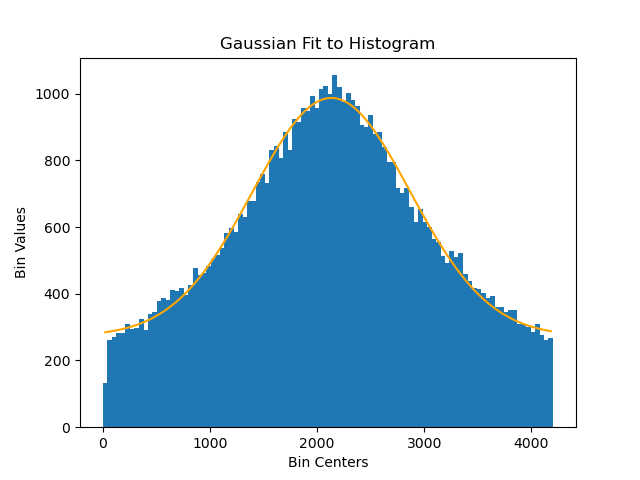

Best Fitting Parameters:  
 Background Level:  181.74121240111185 
 Maximum Count/Bin Value:  848.1899910665402 
 Position of Maximum Count:  2234.2193252214142 
 Standard Deviation:  865.0714635714213 



<IPython.core.display.Javascript object>


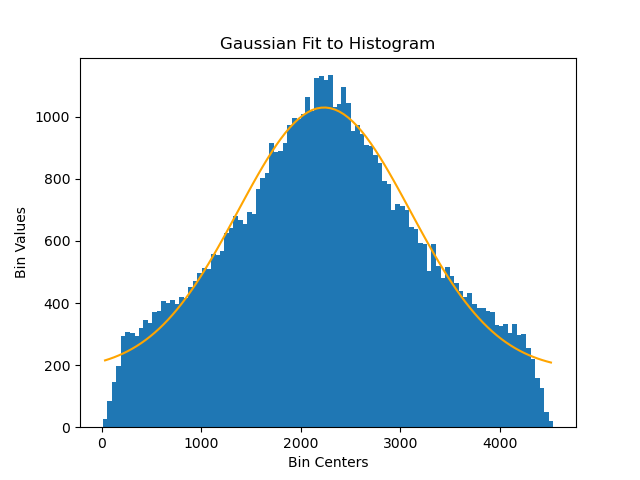

In [12]:
#Now we need to import the scipy.optimize to make our curve fit.
from scipy import optimize

#Now let's create a function for curve_fitting.
def curve_fit(histogram, bincenters, bg_level, height_peak, position_peak, std):
    """Takes the Histogram and Bin Center Data alongside the Background Noise, 
    the Peak of the Histogram/Bin Values/Counts, the Position of that Peak and 
    the standard deviation of the histogram in order to make a fit to the 
    histogram data we are interested in and find the best fitting values for
    all of these parameters.
    
    Returns the Best Fitting Parameter Values and the Fit with the histogram on 
    the same plot."""
    
    #We do our fitting.
    parameters, parameters_covariance = optimize.curve_fit(Gaussian, bincenters, histogram, p0 = [bg_level, height_peak, position_peak, std])
    print("Best Fitting Parameters: ", "\n",
         "Background Level: ", parameters[0], "\n",
         "Maximum Count/Bin Value: ", parameters[1], "\n",
         "Position of Maximum Count: ", parameters[2], "\n",
         "Standard Deviation: ", parameters[3], "\n")
    
    #Now we take the fitted values of our parameters to create our fit.
    fitted_values = Gaussian(bincenters, parameters[0], parameters[1], parameters[2], parameters[3])
    
    #Now we show both our data & our gaussian curve fit in the same plot.
    plt.figure() #Creating the figure

    #We finally fit our data with our fitted values.
    #Since bins = 100 and bar expands on both sides, we take width as 50.
    plt.bar(bincenters, histogram, width = 50)
    
    #We now fit our fitted values.
    plt.plot(bincenters, fitted_values, color="orange")
    
    #We also add Labels and Title.
    plt.title("Gaussian Fit to Histogram")
    plt.xlabel("Bin Centers")
    plt.ylabel("Bin Values")
    
    plt.show()
    
    return parameters[0], parameters[1], parameters[2], parameters[3]

#Now we use the function to plot our Histograms with their fits.

#For X Positions Histogram
bg_noise_x, hist_peak_x, peak_bincenter_x, std_x = curve_fit(histogram_x, center_bins_x, 0, np.max(histogram_x), 2200, np.std(histogram_x))

#For Y Positions Histogram
bg_noise_y, hist_peak_y, peak_bincenter_y, std_y = curve_fit(histogram_y, center_bins_y, 0, np.max(histogram_y), 2200, np.std(histogram_y))

#Note that the Background Level + The Maximum Count/Bin Value will actually give
#us the peak of the Histogram.

### 5-)

### Next, write a function which calculates the Stellar Density Profile of the Cluster: This is the Number of Stars per Square Arcsec vs. Radius in Arcsec from the centre of the cluster.

### To do so, you can first create a Histogram of the Pixel Radii (i.e. Radius from the Measured Cluster Center) at which the stars were detected.

### The UVIS detector Pixel Size corresponds to 0.04 Arcsec per Pixel on the actual sky image.

### You should limit the Maximum Radius considered in order to not include the edges of the image, which destort the measurement. (We recommend limiting the radius to <2000 pixels from the cluster centre).

### Next, divide the Histogram Values for each Radial Bin by the Area of that bin (Which corresponds to an annulus with inner and outer radii set by the bin edges).

### You can also estimate error bars by taking the Square-Root of the number of stars in each Radial Bin and then dividing by the area.

### Plot your Calculated Values of Stellar Density (with error bars) vs. Radius using the Log-Log Scale.

<IPython.core.display.Javascript object>


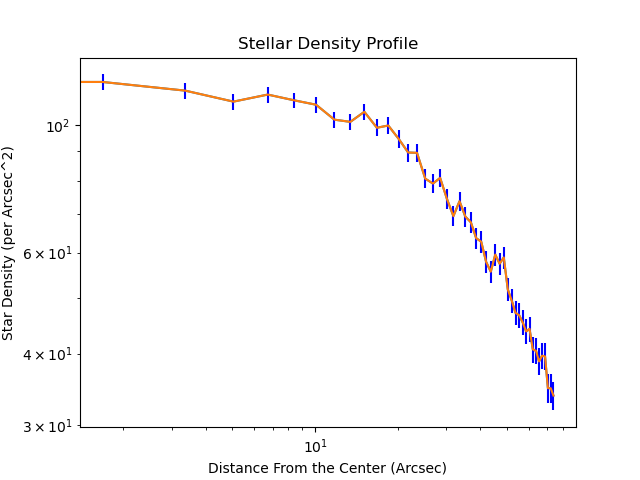

<IPython.core.display.Javascript object>


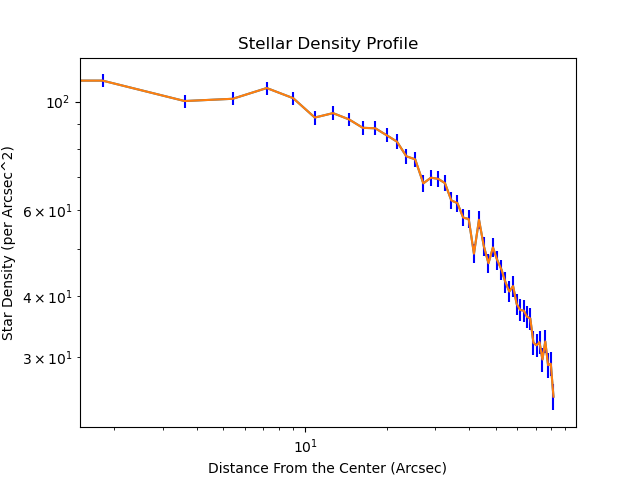

In [68]:
#Let's create our function.

def Stellar_Density_Profile(histogram, bincenters, binedges, cluster_center):
    """Takes the Histogram, Bin Centers and Bin Edges values along side the
    cluster's center which is basically the location of the peak on the given
    histogram.
    
    The function returns a plot of the Stellar Density (with it's errors) in
    arcsec^2 units vs. the Radius of the cluster in arcsec units which is the 
    plot of the Stellar Density Profile of the cluster. The function assumes 
    that one pixel is equal to 0.04 arcsec in the sky.
    
    The function also returns the calculated radius values alongside the stellar
    density values. It also returns the error values for error bar."""
    
    #We know that the Cluster Center is where the peak is at since the maximum
    #number of stars would be expected there.
    #Since we got where our cluster center is from the previous function, we can
    #use that to create our histograms.
    
    #The cluster center we got from our fitting is probably not in our histogram
    #data as a position.
    #For this reason, we should take the closest value to the cluster center 
    #value we found from fitting.
    #We first find the index of the Center Pixel in our Bin Centers array.
    center_pixel_index = min(range(len(bincenters)), key = lambda i : abs(bincenters[i] - cluster_center))
    
    #Now we can take the Center Pixel from our Bin Centers.
    center_pixel = bincenters[center_pixel_index]

    #Now we can do the following to get our Histogram, Bin Centers and Bin Edges
    #starting from the center of the cluster to the edge of it.
    #It is also recommended to cut the edges of the histogram from our measure-
    #ments since it distorts them.
    #For this reason we don't take the last 5 indexes of the histogram.
    histogram_center = histogram[center_pixel_index : len(histogram)-5]
    bincenters_center = bincenters[center_pixel_index : len(bincenters)-5]
    binedges_center = binedges[center_pixel_index : len(binedges)-5]
    
    #Since we want the Center of the Cluster to be zero, we subtract the bin
    #center on our first index (which is the center_pixel we have defined) from 
    #all the bin center values.
    bincenters_center = bincenters_center - center_pixel
    
    #Since we also want the Pixel Coordinates to be instead in unit arcsec and
    #1 pixel = 0.04 arcsec, we can multiply the bin center values with the 0.04
    #value to turn them all into arcsec units.
    bincenters_center_arcsec = bincenters_center * 0.04
    
    #Now let's talk about our Histogram Values for each Radial Bin.
    #Since we have defined our histograms with bins = 100, it means that our 
    #data is represented with equally shaped 100 bins.
    #This means that all of our bins share the same length, for this reason we
    #can find the bar length by just using one of our bars, so two bar edges.
    #We also multiply the size value with "0.04" to convert it to arcsec.
    bar_size = (binedges_center[1] - binedges_center[0]) * 0.04
    
    #Since we want to focus on "annulus with inner and outer radii set by the
    #bin edges" and since an area of an annulus is πR^2, we can do the following
    #to get our bar areas for each histogram bar.
    bar_area = np.pi * pow(bar_size, 2)
    
    #Now we divide all of our Histogram Values by the Bar Areas.
    histogram_density = np.copy(histogram_center) / (bar_area)
    
    #We also take the Square-Root of the Number of Stars in each radial bin and
    #divide that with the area to find our error bars.
    errors = np.sqrt(histogram_center) / bar_area
    
    #Now we do our plotting.
    plt.figure() #Creating the figure
    
    #We create our "Log-Log Scale" plot with the function plt.loglog
    plt.loglog(bincenters_center_arcsec, histogram_density)
    
    #We also plot our Errors with plt.errorbar
        #yerr: Represents the Errors in the y values so our Histogram values.
        #ecolor: Represents the color of the error bars.
    plt.errorbar(bincenters_center_arcsec, histogram_density, yerr = errors, ecolor = "blue")
    
    #We also add Labels and Title.
    plt.title("Stellar Density Profile")
    plt.xlabel("Distance From the Center (Arcsec)")
    plt.ylabel("Star Density (per Arcsec^2)")
    
    plt.show()
    
    return bincenters_center_arcsec, histogram_density, errors

#Now we call our function to plot our Stellar Density Profiles.

#For X Positions of the Stars
radius_values_x, histogram_density_x, errors_x = Stellar_Density_Profile(histogram_x, center_bins_x, bin_edge_x, peak_bincenter_x)

#For Y Positions of the Stars
radius_values_y, histogram_density_y, errors_y = Stellar_Density_Profile(histogram_y, center_bins_y, bin_edge_y, peak_bincenter_y)

### 6-)

### Finally, fit the Stellar Density Profile with a "King Model" Profile, commonly used for globular clusters.

### King Model: $n(r) = n_{0}(1+(r/a)^{2})^{-\gamma/2}$
* **$r$**: Radius
* **$a$**: Radial Scale-Length
* **$\gamma$**: Power-Law Index
* **$n_{0}$**: Normalization at Zero Radius

### You can use your error bars as the values for the sigma parameter in the curve_fit.

### Plot your best-fitting model together with the data and errors (Also using a Log-Log Scale).

### Then use your results to calculate and state the "Core Radius" $r_{c}$ of the cluster in arcsec.

### Core Radius: $r_{c} = a(2^{2/\gamma}-1)^{1/2}$

In [69]:
#Let's define the King Model function first.

def King_Model(radius_values, normal_zero_radius, power_law_index, radial_scale_len):
    """Takes the Radius values as an array with Normalization at Zero Radius, 
    Power-Law Index and Radial Scale-Length values.
    
    Returns the fitted results for Stellar Density for given Radius Values and 
    the given parameters."""
    
    #First, let's create an array for our fitted values.
    fitted_values = np.array([])
    
    #Now we use the King Model formula.
    king_model = normal_zero_radius * (1 + ((radius_values/radial_scale_len)**2)) ** (-(power_law_index)/2)
    fitted_values = np.append(fitted_values, king_model)
    
    return fitted_values

----------------------------------------------------------------------------------------------------
Best Fitting Parameters:  
 Normalization at Zero Radius:  114.97747238806325 
 Power-Law Index:  1.327484868896021 
 Radial Scale-Length:  32.82554263322527 



<IPython.core.display.Javascript object>


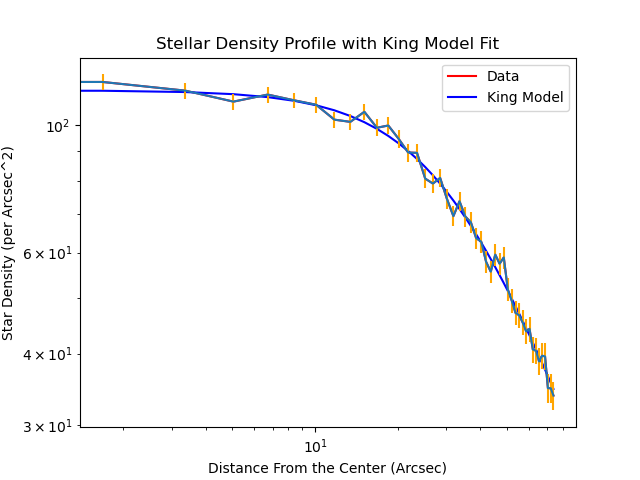

Core Radius = 30.22268939878556 [arcsec]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Best Fitting Parameters:  
 Normalization at Zero Radius:  105.87704240968499 
 Power-Law Index:  1.2489366408406883 
 Radial Scale-Length:  30.08993400653675 



<IPython.core.display.Javascript object>


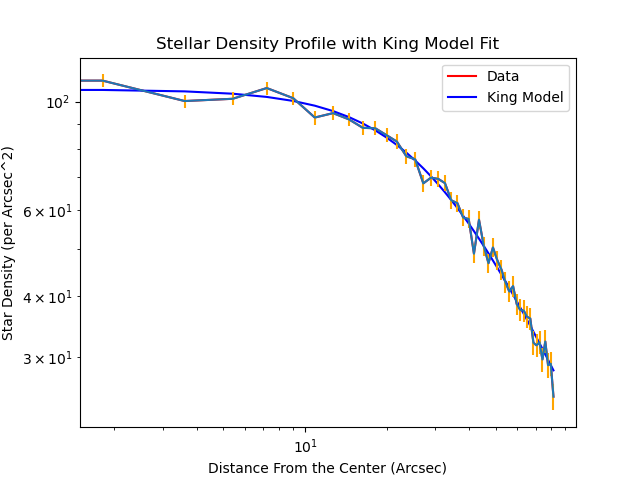

Core Radius = 30.60592977358586 [arcsec]
----------------------------------------------------------------------------------------------------


In [80]:
#Now we do our fitting.
def king_fit(radius_values, histogram_density, error_values, normal_zero_radius, power_law_index, radial_scale_len):
    """Takes the Radius Values, Stellar Density Data and Error values for
    Stellar Density Values alongside the Normalization at Zero Radius, Power-Law
    Index and Radial Scale-Length values in order to make a fit to the Stellar 
    Density Profile we are interested in and find the best fitting values for 
    all these parameters.
    
    Returns the Best Fitting Parameter Values and the Fit with the Stellar
    Density Profile on the same plot including the error bars. The function
    also returns the Core Radius value (i.e. The Radius of the cluster) in 
    arcsec units."""
    
    print(100*"-") #For decoration purposes on our printing.
        
    #We do our fitting.
    parameters, parameters_covariance = optimize.curve_fit(King_Model, radius_values, histogram_density, p0 = [normal_zero_radius, power_law_index, radial_scale_len])
    print("Best Fitting Parameters: ", "\n",
         "Normalization at Zero Radius: ", parameters[0], "\n",
         "Power-Law Index: ", parameters[1], "\n",
         "Radial Scale-Length: ", parameters[2], "\n")
    
    #Now we take the fitted values of our parameters to create our fit.
    fitted_values = King_Model(radius_values, parameters[0], parameters[1], parameters[2])
    
    #Now we show both our data & our King Model curve fit in the same plot.
    plt.figure() #Creating the figure
    
    #We create our "Log-Log Scale" plot with the function plt.loglog
    plt.loglog(radius_values, histogram_density, color="red", label = "Data")
    
    #We also plot our fit results.
    plt.plot(radius_values, fitted_values, color="blue", label = "King Model")
    
    #We also plot our Errors with plt.errorbar
        #yerr: Represents the Errors in the y values so our Histogram values.
        #ecolor: Represents the color of the error bars.
    plt.errorbar(radius_values, histogram_density, yerr = error_values, ecolor = "orange")
    
    #We also add Labels and Title.
    plt.title("Stellar Density Profile with King Model Fit")
    plt.xlabel("Distance From the Center (Arcsec)")
    plt.ylabel("Star Density (per Arcsec^2)")
    
    #We also add a Legend.
    plt.legend()
    
    plt.show()
    
    #Finally, we calculate our Core Radius by using the following formula
    # parameters[2] => Radical Scale Length
    # parameters[1] => Power-Law Index
    core_radius = parameters[2] * ((2**(2/parameters[1]))-1)**1/2
    
    print("Core Radius =", core_radius, "[arcsec]")
    
    print(100*"-") #For decoration purposes on our printing.
    return core_radius

#Now we use the function to plot our Stellar Density Profiles with their fits.

#For X Positions Stellar Density Profile
core_radius_x = king_fit(radius_values_x, histogram_density_x, errors_x, 120, 1.5, 30)

#For Y Positions Stellar Density Profile
core_radius_y = king_fit(radius_values_y, histogram_density_y, errors_y, 120, 1.5, 30)
